# Uncertainty Demo with Brightway2.5
This notebook demonstrates how to:
- Set up a Brightway2.5 project
- Import an Excel-based foreground system
- Apply Pedigree Matrix uncertainty
- Run Monte Carlo LCA
- Visualize the uncertainty distribution

## Setup and Initialization

In [1]:
from src import lca_utils
import matplotlib.pyplot as plt
import bw2data as bd

In [2]:
lca_utils.setup_project("for_uncertainty")

Biosphere database already present!!! No setup is needed


## Import Foreground System from Excel

In [3]:
lca_utils.import_background("...your ecoinvent link", "ev391cutoff_uni")
lca_utils.import_foreground_with_uncertainty(
    excel_path="../data/excel_importer_example.xlsx",
    fg_db_name="foreground_db",
    bg_db_name="ev391cutoff_uni"
)

[INFO] Background DB already exists.
Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 11.41 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


100%|██████████| 3/3 [00:00<?, ?it/s]


Vacuuming database 
Created database: foreground_db
[INFO] Foreground DB written.


## Apply Pedigree Matrix Uncertainty to Foreground Exchanges and Monte Carlo Simulation

In [4]:
impact_category = [m for m in bd.methods if 'IPCC 2021' in str(m) and 'GWP100' in str(m)][0]
database_name = "foreground_db"
reference_product = "flameprotection"

In [5]:
results = lca_utils.run_mc_simulation(
    fg_db_name=database_name,
    product_key=reference_product,
    method = impact_category,
    iterations=100
)

## Plot Results

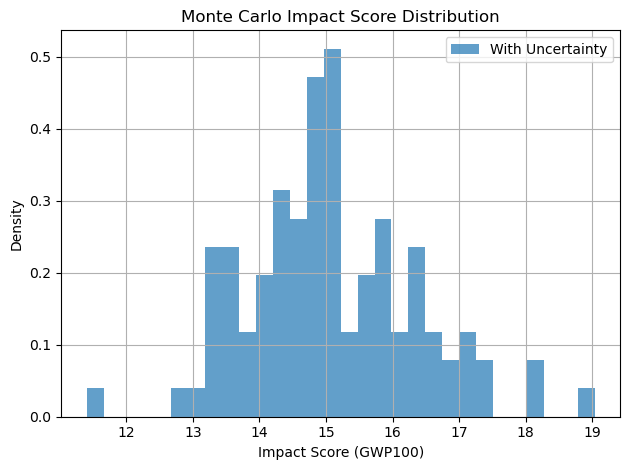

In [6]:
plt.hist(results, bins=30, density=True, alpha=0.7, label="With Uncertainty")
plt.title("Monte Carlo Impact Score Distribution")
plt.xlabel("Impact Score (GWP100)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()